In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
min_year = 1920
max_year = 2008

In [3]:
df = pd.read_csv("watched.csv")

In [4]:
print(df["Year"].describe())

count    1360.000000
mean     1998.786765
std        21.750850
min      1920.000000
25%      1987.000000
50%      2006.000000
75%      2015.000000
max      2024.000000
Name: Year, dtype: float64


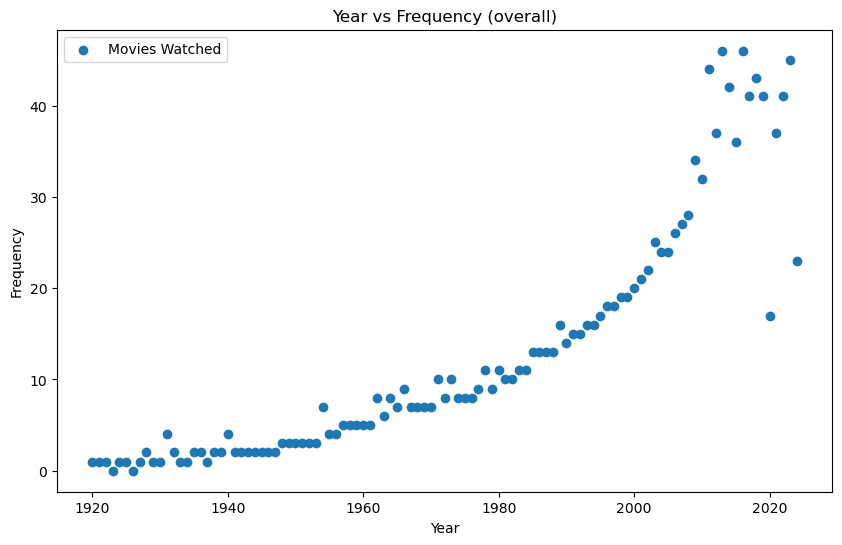

In [5]:
year_frequency = df['Year'].value_counts().reset_index()
year_frequency.columns = ['Year', 'Frequency']

missing_years = [{'Year': i, 'Frequency': 0} for i in range(min_year, max_year) if i not in year_frequency['Year'].values]
missing_years_df = pd.DataFrame(missing_years)
year_frequency = pd.concat([year_frequency, missing_years_df]).sort_values('Year').reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.scatter(year_frequency['Year'], year_frequency['Frequency'], label='Movies Watched')
plt.title('Year vs Frequency (overall)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [6]:
year_frequency = year_frequency[(year_frequency['Year'] >= min_year) & (year_frequency['Year'] <= max_year)]
X = year_frequency['Year'].values.reshape(-1, 1)
y = year_frequency['Frequency'].values
print(year_frequency)

    Year  Frequency
0   1920          1
1   1921          1
2   1922          1
3   1923          0
4   1924          1
..   ...        ...
84  2004         24
85  2005         24
86  2006         26
87  2007         27
88  2008         28

[89 rows x 2 columns]


In [7]:
mono_increase = year_frequency.copy()

In [8]:
# loop through mono_increase['Year] and reassign the frequency to the maximum frequency seen so far
for i in range(1, len(mono_increase)):
    mono_increase['Frequency'][i] = max(mono_increase['Frequency'][i], mono_increase['Frequency'][i - 1])


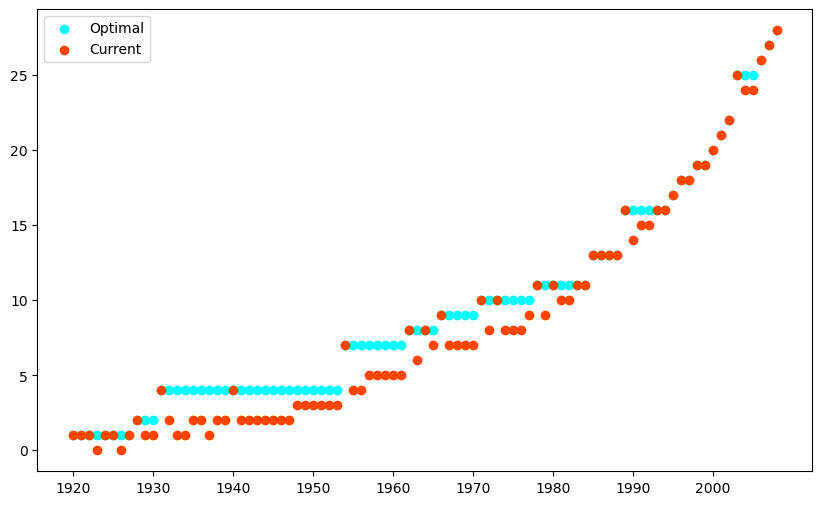

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(mono_increase['Year'], mono_increase['Frequency'], label='Optimal', color='Aqua')
plt.scatter(year_frequency['Year'], year_frequency['Frequency'], label='Current', color='orangered')
plt.legend()
plt.xticks(np.arange(min_year, max_year+1, 10))
plt.show()

In [10]:
diff_df = pd.DataFrame({'Year': year_frequency['Year'], 'Diff': mono_increase['Frequency'] - year_frequency['Frequency']})
print(diff_df.sort_values(by=['Diff', 'Year'], ascending=[False, False]).head(16))
print(sum(diff_df['Diff']))

    Year  Diff
36  1956     3
35  1955     3
17  1937     3
14  1934     3
13  1933     3
70  1990     2
59  1979     2
56  1976     2
55  1975     2
54  1974     2
52  1972     2
50  1970     2
49  1969     2
48  1968     2
47  1967     2
43  1963     2
89


In [11]:
max_diff = diff_df['Diff'].max()
random_year = diff_df[diff_df['Diff'] == max_diff].sample(1)
print(random_year['Year'].values[0])



1956


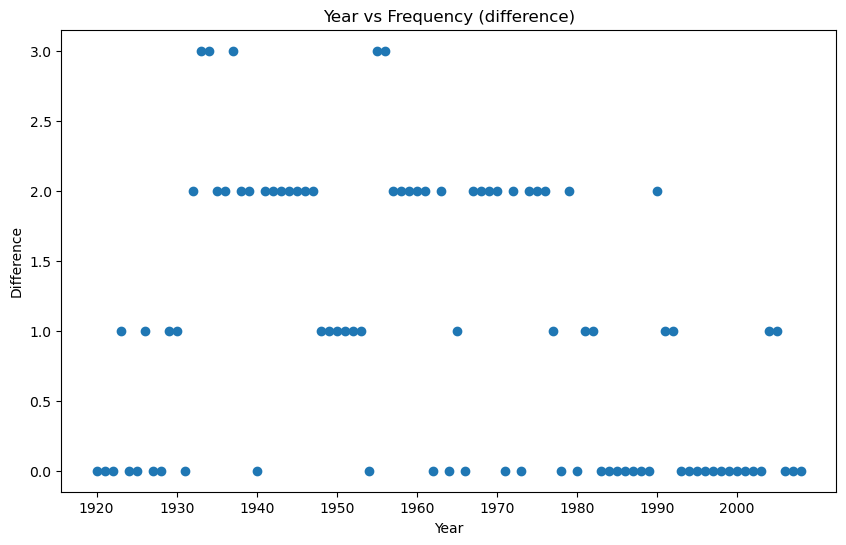

In [12]:
# plot the difference
plt.figure(figsize=(10, 6))
plt.scatter(diff_df['Year'], diff_df['Diff'])
plt.title('Year vs Frequency (difference)')
plt.xlabel('Year')
plt.ylabel('Difference')
plt.xticks(np.arange(min_year, max_year+1, 10))
plt.show()